### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score
import matplotlib.pyplot as plt

### Data exploration

In [2]:
data = pd.read_csv('diabetes2.csv')

In [3]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
data.shape

(768, 9)

### Splitting the dataset for train and test 

In [5]:
X = data.iloc[:,:-1]
Y = data['Outcome']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.15, random_state=1)

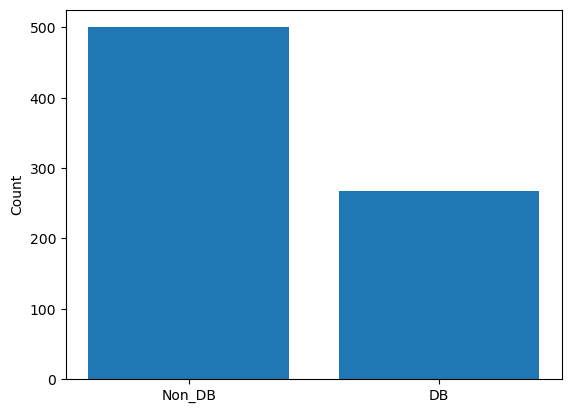

In [6]:
unique, counts = np.unique(Y, return_counts=True)
plt.bar(unique, counts)
plt.xticks([0, 1], ['Non_DB', 'DB'])
plt.ylabel('Count')
plt.show()

### Building the pipeline with the Standard Scaler and Logistic regression 

Standard Scaler is employed in logistic regression to address the issue of disparate scales among input features. Logistic regression models make predictions based on weighted sums of features, and when these features are on different scales, it can hinder the optimization process. The use of Standard Scaler transforms the features to have zero mean and unit variance, ensuring that each feature contributes more uniformly to the model. This not only aids in faster convergence during training, especially when optimization algorithms like Gradient Descent are utilized, but it also prevents certain features from dominating the learning process due to their scale. Ultimately, employing Standard Scaler in logistic regression contributes to a more stable and effective training process, leading to improved model performance.

In [12]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression())

log_reg.fit(X_train,Y_train)

predictions = log_reg.predict(X_test)

In [13]:
print('Accuracy Score', accuracy_score(Y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(Y_test, predictions))

Accuracy Score 0.7327586206896551
Confusion Matrix: 
 [[67  9]
 [22 18]]


#### Using the stratifying option in Train test split and using class_wieght = 'balanced' to see if the model will do good if the class imbalance is worked upon

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.15, random_state=1, stratify = Y)

In [15]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression())

log_reg.fit(X_train,Y_train)

predictions = log_reg.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(Y_test, predictions))


Accuracy Score 0.7327586206896551
Confusion Matrix: 
 [[67  9]
 [22 18]]


In [16]:
log_reg = make_pipeline(StandardScaler(), LogisticRegression(class_weight = 'balanced'))

log_reg.fit(X_train,Y_train)

predictions = log_reg.predict(X_test)
print('Accuracy Score', accuracy_score(Y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(Y_test, predictions))
print('Precision Score', precision_score(Y_test, predictions))

Accuracy Score 0.7413793103448276
Confusion Matrix: 
 [[58 18]
 [12 28]]
Precision Score 0.6086956521739131


The False Negatives are pretty high comparing both the stratified split and using the class weight function as balanced and as the model is for predicting Diabetes and it is better to avoid False Negatives